In [3]:
import csv
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

#Load in the CSV Bike Station Location Data
df = pd.read_csv('HRSQ12020.csv')

#combine the latitude and longitude to make coordinates
df['coordinates'] = df[['Longitude', 'Latitude']].values.tolist()

# Change the coordinates to a geoPoint
df['coordinates'] = df['coordinates'].apply(Point)
df.head()

,Station #,Station Name,NumRacks,Latitude,Longitude,coordinates
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679,POINT (-80.00467900000001 40.441326)
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080,POINT (-80.00308000000001 40.440877)
2,1002,Third Ave & Wood St,15,40.439030,-80.001860,POINT (-80.00185999999999 40.43903)
3,1003,First Ave & Smithfield St (Art Institute),15,40.437200,-80.000375,POINT (-80.00037500000001 40.4372)
4,1004,First Ave & B St (T Station),15,40.435887,-79.997102,POINT (-79.997102 40.435887)


In [4]:
#fixing wrong negative value for Latitude
df.loc[df["Latitude"] == df["Latitude"].min()]
df.at[80, 'Latitude'] = 40.467715

df.to_csv('bikes_station_location.csv', index=False)  

#count the numner of racks at each station
rackTot = 0
for index, row in df.iterrows():
      rackTot += row['NumRacks']
print(rackTot)

1085


In [5]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
geobikes = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geobikes.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Station #,Station Name,NumRacks,Latitude,Longitude,coordinates,geometry
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679,POINT (-80.00467900000001 40.441326),POINT (-80.00468 40.44133)
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080,POINT (-80.00308000000001 40.440877),POINT (-80.00308 40.44088)
2,1002,Third Ave & Wood St,15,40.439030,-80.001860,POINT (-80.00185999999999 40.43903),POINT (-80.00186 40.43903)
3,1003,First Ave & Smithfield St (Art Institute),15,40.437200,-80.000375,POINT (-80.00037500000001 40.4372),POINT (-80.00038 40.43720)
4,1004,First Ave & B St (T Station),15,40.435887,-79.997102,POINT (-79.997102 40.435887),POINT (-79.99710 40.43589)


<AxesSubplot:>

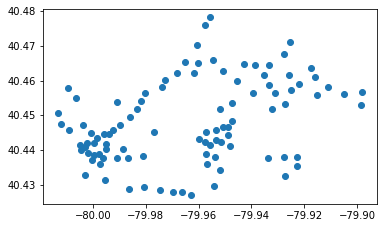

In [6]:
#plot the geodf
#not working for some reason, fix later
geobikes.plot()

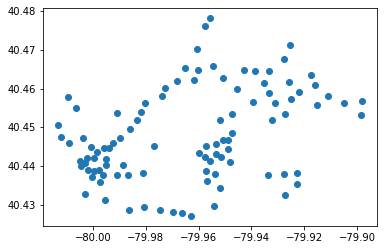

In [5]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

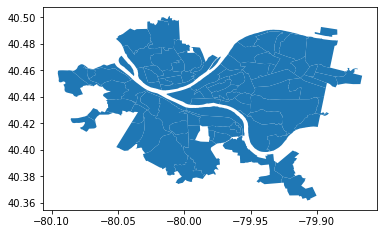

In [7]:
#Plot the Pittsburgh Neighborhoods
pittMap = gpd.read_file('Neighborhoods/ecc95d19-e9fb-46a3-be05-e7e103f362a52020328-1-565pof.jnegf.shp')
pittMap.plot()

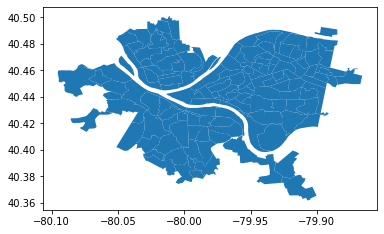

In [8]:
censusTract = gpd.read_file('2010_Census_Tracts/a36fc9b1-4e53-4fd1-80fb-db1554e213422020328-1-nbfxcj.l6b8.shp')
censusTract.plot()

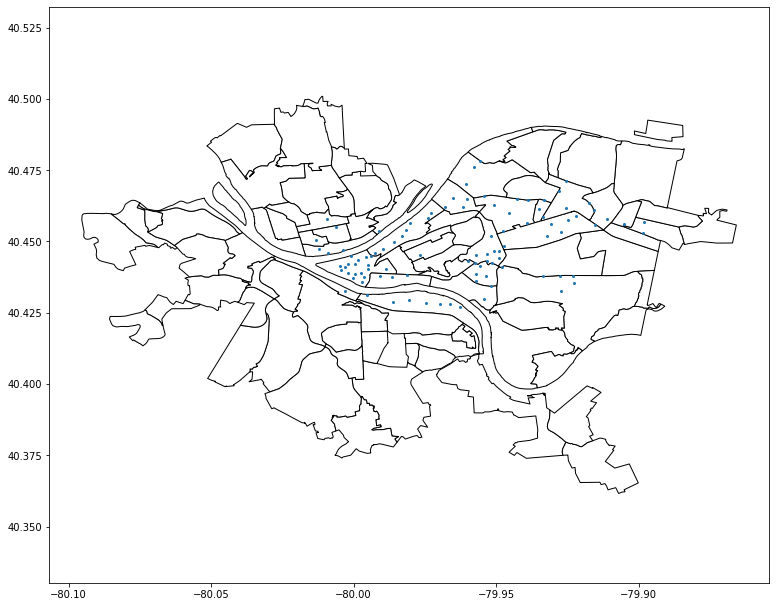

In [31]:
#Use matplotlib to plot the pittsburgh neighborhoods
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.set_position([0,0,1,1])   # Puts axis to edge of figure
lims = plt.axis('equal')
ax.set_aspect('equal')
pittMap.plot(ax = ax, color='white', edgecolor='black')
#geopandas plotting was not working, so I just plotted the scatter plot on top of the map for now...
#result = plt.scatter(df['Longitude'], df['Latitude'], 15, marker='o', color='Blue')
geobikes.plot(ax=ax, markersize=4);

In [204]:
#Make the points from our dataframe bike station locations
#specify coordinate reference system and make GeoDataFrame
crs = "epsg:4326"
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)